In [1]:
import pandas as pd

# PANDAS

### Timeseries index

You can't create a dataframe with a named index. Better create the index as a column and then use `set_index`.

In [5]:
df = pd.DataFrame({'date':pd.date_range("2018-01-01", periods=12, freq="MS"),
                   'value':range(0,12)})
df.set_index('date', inplace= True)
df.head(3)

,value
date,
2018-01-01,0
2018-02-01,1
2018-03-01,2


Sampling at a quarterly frequency

In [6]:
df.resample("Q").agg("sum")

,value
date,
2018-03-31,3
2018-06-30,12
2018-09-30,21
2018-12-31,30


Plots

<AxesSubplot: xlabel='date'>

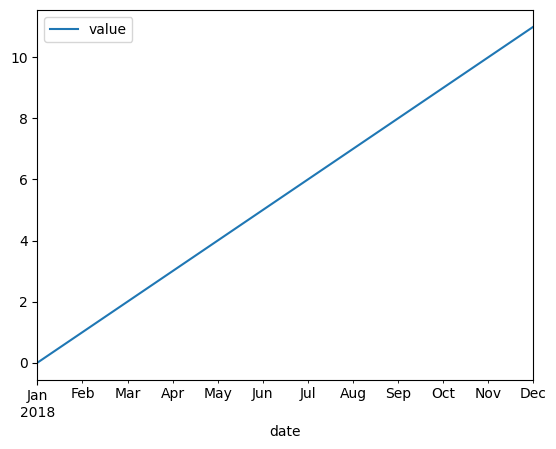

In [7]:
df.plot()

### Merging on index and column

In [8]:
df1 = pd.DataFrame({'date':['2018-01-01','2018-01-02','2018-01-01','2018-01-02'],
                   'group':['A','A','B','B']})
df1['date']=pd.to_datetime(df1['date'])
df1.set_index('date', inplace= True)
df1

,group
date,
2018-01-01,A
2018-01-02,A
2018-01-01,B
2018-01-02,B


In [9]:
df2 = pd.DataFrame({'date':['2018-01-01','2018-01-02','2018-01-01','2018-01-02'],
                   'group':['A','A','B','B'],
                   'value':[1,2,3,4]})
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date', inplace= True)
df2

,group,value
date,,
2018-01-01,A,1
2018-01-02,A,2
2018-01-01,B,3
2018-01-02,B,4


In [10]:
pd.merge(df1,df2, on =['date','group'])

,group,value
date,,
2018-01-01,A,1
2018-01-02,A,2
2018-01-01,B,3
2018-01-02,B,4


In [12]:
df3 = pd.DataFrame({'group':['A','B'], 'name':['Arts','Biology']})
df3

,group,name
0,A,Arts
1,B,Biology


Keep index after merge

In [18]:
df1.reset_index().merge(df3).set_index('date')

,group,name
date,,
2018-01-01,A,Arts
2018-01-02,A,Arts
2018-01-01,B,Biology
2018-01-02,B,Biology


## Growth and missing values

In [44]:
df = pd.DataFrame({'date':[2000,2001,2002,2004,2005,2006,2007],
                   'value':[1,2,3,6,6,None,3],
                   'pct_change':[None,1,0.5,None,1,None,None]})
df.date = pd.to_datetime(df.date.astype(str))
df.set_index('date', inplace= True)
df

,value,pct_change
date,,
2000-01-01,1.0,NaN
2001-01-01,2.0,1.0
2002-01-01,3.0,0.5
2004-01-01,6.0,NaN
2005-01-01,6.0,1.0
2006-01-01,NaN,NaN
2007-01-01,3.0,NaN


In [51]:
df['pct_change']=df['value'].pct_change(periods=1,fill_method=None, freq=pd.DateOffset(years=1))
df

,value,pct_change
date,,
2000-01-01,1.0,NaN
2001-01-01,2.0,1.0
2002-01-01,3.0,0.5
2004-01-01,6.0,NaN
2005-01-01,6.0,0.0
2006-01-01,NaN,NaN
2007-01-01,3.0,NaN
